# Exploratory Data Analysis

In [116]:
import sys
import pandas as pd
import numpy as np
import nltk
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
# load data
full_data = pd.read_csv('Reviews.csv')
full_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [221]:
# convert Time variable (timestamp) to date
from datetime import datetime
full_data['Time_updated'] = [datetime.fromtimestamp(x) for x in full_data.Time]

# create year, month, and day variables from date
full_data['Year'] = [x.year for x in full_data.Time_updated]
full_data['Month'] = [x.month for x in full_data.Time_updated]
full_data['Day'] = [x.day for x in full_data.Time_updated]

In [222]:
full_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Char_per_Text,N_Words_per_Text,Time_updated,Year,Month,Day
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,49,2011-04-26 17:00:00,2011,4,26
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,31,2012-09-06 17:00:00,2012,9,6
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,99,2008-08-17 17:00:00,2008,8,17
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,43,2011-06-12 17:00:00,2011,6,12
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,30,2012-10-20 17:00:00,2012,10,20


### Quick Stats

In [12]:
# Number of Reviews
len(full_data)

568454

In [16]:
# Number of Products
len(full_data.ProductId.unique())

74258

In [17]:
# Number of UserId
len(full_data.UserId.unique())

256059

In [18]:
# Number of ProfileName
len(full_data.ProfileName.unique())

218417

### Numerical Data Summary

In [22]:
full_data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [27]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568428 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


### Score

In [207]:
# find score distribution
scores = full_data.groupby('Score').size().reset_index(name='count')
scores['percent'] = scores['count']/len(full_data)
scores

,Score,count,percent
0,1,52268,0.091948
1,2,29769,0.052368
2,3,42640,0.075010
3,4,80655,0.141885
4,5,363122,0.638789


Text(0.5,1,'Score Distribution')

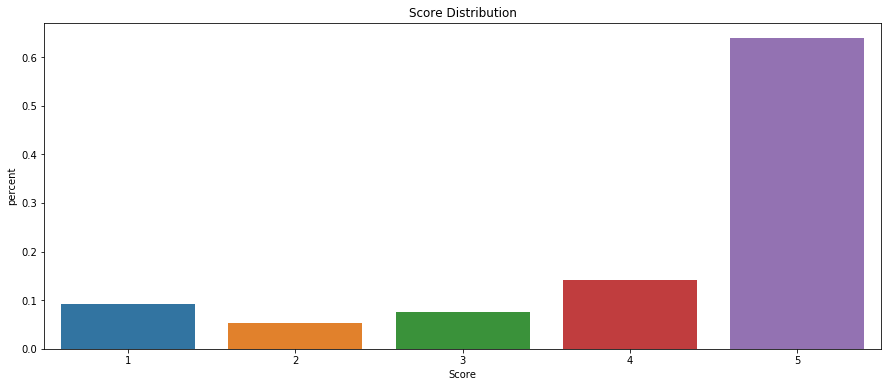

In [254]:
# plot distribution
plt.rcParams["figure.figsize"] = (15,6)
sns.barplot(x='Score', y='percent', data=scores)
plt.title('Score Distribution')

### Number of Characters per Review (Char_per_Text)

In [193]:
# create variable
full_data['Char_per_Text'] = full_data['Text'].str.len()
full_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Char_per_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509


In [272]:
print(f"Average # of Characters per review: {np.mean(full_data['Char_per_Text'])}")
print(f"Median # of Characters per review: {np.median(full_data['Char_per_Text'])}")

Average # of Characters per review: 436.22208305333413
Median # of Characters per review: 302.0


Text(0.5,1,'Characters per Review Distribution')

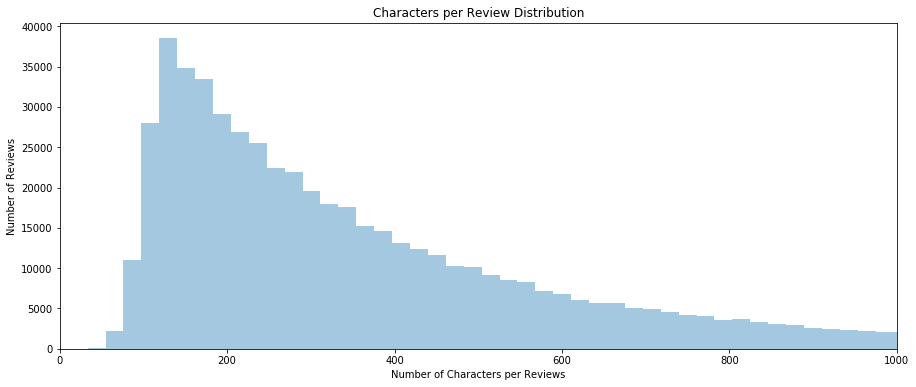

In [250]:
# plot distribution
dist = sns.distplot(full_data['Char_per_Text'], bins = 1000, kde=False)
dist.set(xlim=(0,1000))
plt.ylabel("Number of Reviews")
plt.xlabel("Number of Characters per Reviews")
plt.title("Characters per Review Distribution")

### Number of Words per Review (N_Words_per_Text)

In [213]:
# create list containing number of words for all reviews
nwords = []
for i in full_data['Text'].values:
    nwords.append(len(i.split(' ')))

In [216]:
# create variable in full data
full_data['N_Words_per_Text'] = nwords
full_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Char_per_Text,N_Words_per_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,30


In [273]:
print(f"Average # of Words per review: {np.mean(full_data['N_Words_per_Text'])}")
print(f"Median # of Words per review: {np.median(full_data['N_Words_per_Text'])}")

Average # of Words per review: 82.00552199474363
Median # of Words per review: 58.0


Text(0.5,1,'Words per Review Distribution')

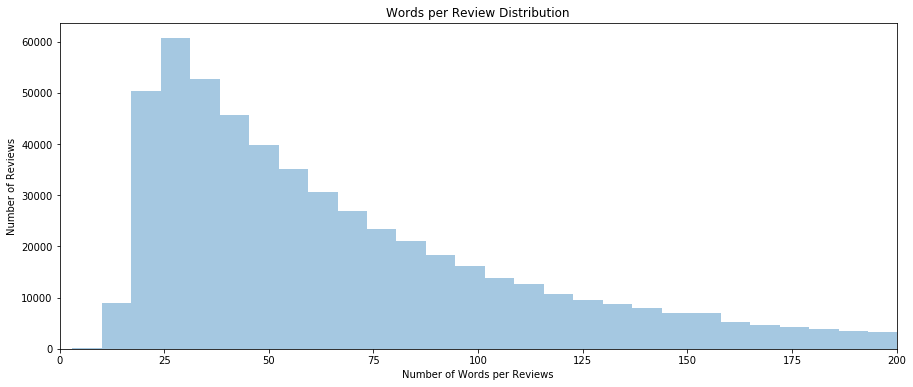

In [253]:
# plot distribution
dist = sns.distplot(full_data['N_Words_per_Text'], bins = 500, kde=False)
dist.set(xlim=(0,200))
plt.ylabel("Number of Reviews")
plt.xlabel("Number of Words per Reviews")
plt.title("Words per Review Distribution")

### Number of Reviews per Product

In [115]:
# get number of reviews per product
reviews_per_product = data.groupby('ProductId').size().reset_index(name='count')
reviews_per_product.head()

,ProductId,count
0,0006641040,37
1,141278509X,1
2,2734888454,2
3,2841233731,1
4,7310172001,173


In [145]:
# stats on variable
reviews_per_product.describe()

,count
count,74258.000000
mean,7.655121
std,26.453485
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,913.000000


Text(0.5,1,'Reviews per Product Distribution')

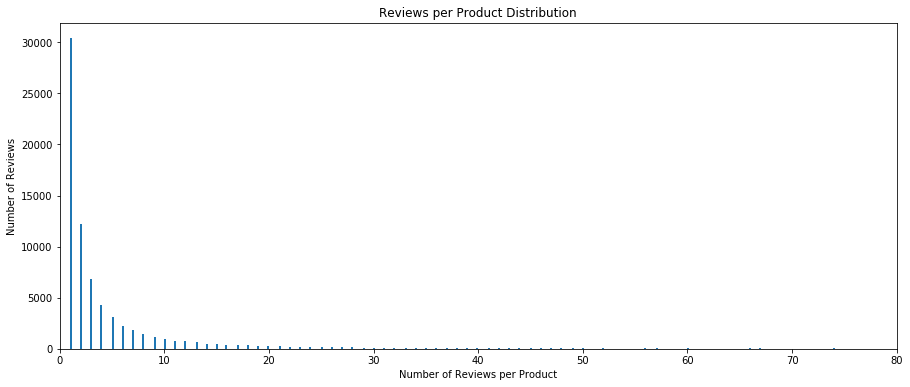

In [262]:
# plot distribution
plt.hist(reviews_per_product['count'], bins='auto')
plt.xlim([0, 80])
plt.xlabel('Number of Reviews per Product')
plt.ylabel('Number of Reviews')
plt.title('Reviews per Product Distribution')

### Number of Reviews per UserId

In [162]:
# get number of reviews per user id
reviews_per_user = data.groupby('UserId').size().reset_index(name='count')
reviews_per_user.head()

,UserId,count
0,#oc-R103C0QSV1DF5E,1
1,#oc-R109MU5OBBZ59U,1
2,#oc-R10LFEMQEW6QGZ,1
3,#oc-R10LT57ZGIB140,1
4,#oc-R10UA029WVWIUI,1


In [163]:
# stats on variable
reviews_per_user.describe()

,count
count,256059.000000
mean,2.220012
std,4.443361
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,448.000000


Text(0.5,1,'Reviews per UserId Distribution')

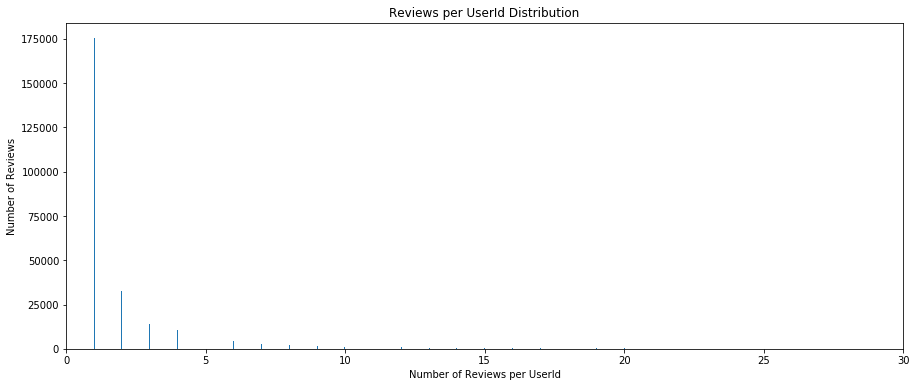

In [264]:
# plot distribution
plt.hist(reviews_per_user['count'], bins = 'auto')
plt.xlim([0, 30])
plt.xlabel('Number of Reviews per UserId')
plt.ylabel('Number of Reviews')
plt.title('Reviews per UserId Distribution')

### Export data to csv

In [224]:
full_data.to_csv('eda_data.csv')